In [34]:
import numpy as np
from sklearn.metrics import mean_squared_error
import pandas as pd
import random
import matplotlib.pyplot as plt

# import kagglehub


# # Download latest version
# path = kagglehub.dataset_download("mohansacharya/graduate-admissions")

# print("Path to dataset files:", path)


In [3]:
df = pd.read_csv("./Admission_Predict.csv", index_col = 0)
data = df.to_numpy()
def split_data(data, split):
    np.random.shuffle(data)
    train = int(len(data) * split)
    X = data[:,:-1]
    Y = data[:,-1]
    return X[:train], Y[:train], X[train:], Y[train:]

Xtrain, Ytrain, Xtest, Ytest = split_data(data, 0.8)
    
print(Xtrain.shape, Xtest.shape)
print(Ytrain.shape, Ytest.shape)

(320, 7) (80, 7)
(320,) (80,)


In [ ]:

# Initialize weights
def initialize_weights(X):
    X = np.hstack((X.reshape(-1, 1), np.ones((X.shape[0], 1))))  # Add bias term
    thetas = np.ones(X.shape[1])  # Initialize weights to 1
    return X, thetas

# Hypothesis function (Linear model)
def hypothesis(X, theta):
    return np.dot(X, theta)

# Derivative of the cost function (gradient)
def derivative_of_cost(X, y, theta):
    y_pred = hypothesis(X, theta)
    error = y_pred - y
    grads = (2 / X.shape[0]) * np.dot(X.T, error)  # Gradient calculation
    # print('derivvatibe', len(grads))
    return grads

# Gradient Descent
def gradient_descent(X, y, theta, learning_rate):
    grads = derivative_of_cost(X, y, theta)
    theta -= learning_rate * grads  # Update weights
    return theta

# Training function
def train_model(X, y, learning_rate=0.01, iterations=100):
    X, theta = initialize_weights(X)  # Add bias term and initialize weights
    print('Weights initialized successfully.')

    for i in range(iterations):
        theta = gradient_descent(X, y, theta, learning_rate)  # Update weights
        
        if i % 10 == 0:  # Print loss every 10 iterations
            y_pred = hypothesis(X, theta)
            loss = mean_squared_error(y, y_pred)
            print(f'Iteration {i}, Loss: {loss}')
    
    return theta

# Example usage
# Ensure Xtrain and Ytrain are properly prepared numpy arrays
# Xtrain: feature matrix, Ytrain: target values
# Xtrain = np.array([...])  #
train_model(Xtrain, Ytrain, learning_rate=0.01, iterations=1000)

In [68]:
class LinearRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iters = iterations
        self.trainingloss = []
    def train(self, X, Y):
        Y = Y.reshape(-1,1)
        X = np.hstack((X, np.ones((X.shape[0], 1))))
        self.thetas = np.random.randn(X.shape[1],1) * self.learning_rate
        # print(self.thetas.shape)
        for i in range(self.iters):
            # if i == 0:
            #     X, self.thetas = self.hyp(X, None, initializer=True)
            self.gradient_descent(X,Y)
            if i % 10 == 0:
                loss = self.cost_function(self.hyp(X, self.thetas), Y)
                self.trainingloss.append(loss)
                print(f"Loss at iteration {i} is: {loss}")
        return self.thetas
        
    def hyp(self, X, thetas):
        # if initializer:
        #     X = np.hstack((X, np.ones((X.shape[0], 1))))
        #     self.thetas = np.ones((X.shape[1],1))
        #     return X, self.thetas
        return np.dot(X, thetas)

    def cost_function(self, yact, ypred):
        return np.mean(np.square(yact - ypred))

        
    def derivative_of_cost(self, X, Y):
        ypred = self.hyp(X, self.thetas)
        error = Y - ypred
        gradients = -(2 / X.shape[0]) * np.dot(X.T, error)
        return gradients
        
    def gradient_descent(self, X, Y):
        dt = self.derivative_of_cost(X,Y)
        self.thetas -= self.learning_rate * dt

    def predict(self, Xtest):
        Xtest = (Xtest - np.mean(Xtest, axis=0)) / np.std(Xtest, axis=0)
        Xtest = np.hstack((Xtest, np.ones((Xtest.shape[0], 1))))
        # print(Xtest.shape, self.thetas.shape)
        return self.hyp(Xtest, self.thetas)

    def plot_data(self, X, Y):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 0], Y, color='blue', label='Data points')  # Plotting first feature vs target
        plt.xlabel('X values (First feature)')
        plt.ylabel('Y values')
        plt.title('Data Plot')
        plt.legend()
        plt.show()

    # Function to plot the best-fit line (based on predictions for first feature)
    def plot_best_fit(self, X, Y):
        plt.figure(figsize=(8, 6))
        plt.scatter(X[:, 3], Y, color='blue', label='Data points')  # Plotting first feature vs target
        Y_pred = self.predict(X)  # Getting the predictions for the line
        plt.plot(X[:, 1], Y_pred, color='red', label='Best Fit Line')  # Plotting the best fit line
        plt.xlabel('X values (First feature)')
        plt.ylabel('Y values')
        plt.title('Best Fit Line')
        plt.legend()
        plt.show()
        
    def plot_loss(self):
        plt.figure(figsize=(8, 6))
        plt.plot(range(0, len(self.trainingloss)*100, 100), self.trainingloss, color='green', label='Training Loss')
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.show()

lr = LinearRegression(learning_rate = 0.0001, iterations = 10000)    
Xtrain = (Xtrain - np.mean(Xtrain, axis=0)) / np.std(Xtrain, axis=0)
Ytrain = (Ytrain - np.mean(Ytrain, axis=0)) / np.std(Ytrain, axis=0)

trained_thetas = lr.train(Xtrain, Ytrain)
trained_thetas
preds = lr.predict(Xtest)

mse = lr.cost_function(Ytest, preds)
print(f"Mean Squared Error: {mse}")

# print("Accuracy: ", sum(preds == Ytest)/len(preds))
# print(preds)
# print(Ytest)

Loss at iteration 0 is: 0.9988496769813213
Loss at iteration 10 is: 0.9838310516008761
Loss at iteration 20 is: 0.969103619293549
Loss at iteration 30 is: 0.9546617207552555
Loss at iteration 40 is: 0.9404998066925495
Loss at iteration 50 is: 0.9266124356840884
Loss at iteration 60 is: 0.9129942720836677
Loss at iteration 70 is: 0.899640083964022
Loss at iteration 80 is: 0.8865447411005958
Loss at iteration 90 is: 0.8737032129945078
Loss at iteration 100 is: 0.8611105669339499
Loss at iteration 110 is: 0.8487619660932697
Loss at iteration 120 is: 0.836652667669006
Loss at iteration 130 is: 0.8247780210521597
Loss at iteration 140 is: 0.8131334660359929
Loss at iteration 150 is: 0.8017145310586695
Loss at iteration 160 is: 0.7905168314800555
Loss at iteration 170 is: 0.7795360678920189
Loss at iteration 180 is: 0.7687680244615767
Loss at iteration 190 is: 0.7582085673062483
Loss at iteration 200 is: 0.7478536429009928
Loss at iteration 210 is: 0.7376992765161134
Loss at iteration 220 is

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(Xtrain, Ytrain)

preds = model.predict(Xtest)
mse = mean_squared_error(Ytest, preds)
print(f"Mean Squared Error: {mse}")
mae = mean_absolute_error(Ytest, preds)
print(f"Mean Absolute Error: {mae}")


Mean Squared Error: 3234.138073176528
Mean Absolute Error: 56.824413986504055


(320, 7) (320, 1)


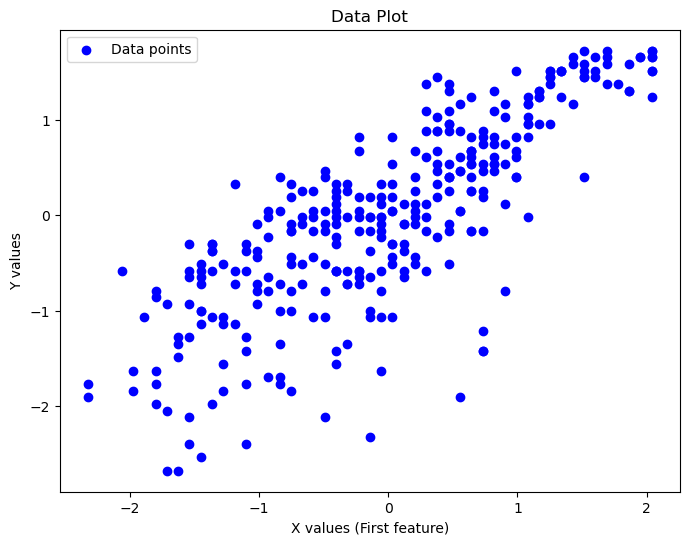

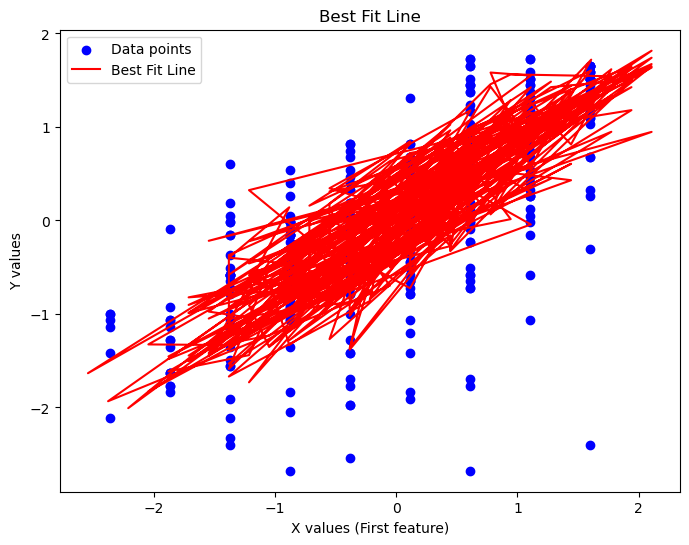

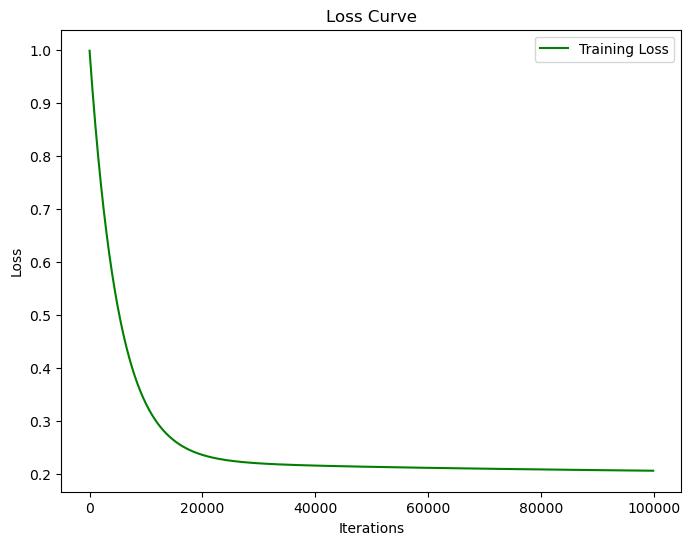

In [70]:
print(Xtrain.shape, Ytrain.reshape(-1,1).shape)
lr.plot_data(Xtrain, Ytrain.reshape(-1,1))  
lr.plot_best_fit(Xtrain, Ytrain.reshape(-1,1)) 
lr.plot_loss()